## Ecuación normal ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [2]:
data = pd.read_csv('DataSets/velocidad.csv', index_col = 0)
data.head()

,t,v
0,0.898853,6.531912
1,1.159800,8.078056
2,1.552927,10.420049
3,1.661786,8.943986
4,1.293464,7.968670


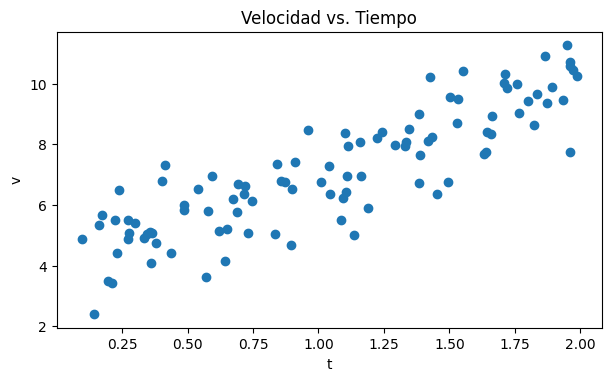

In [3]:
fig, ax = plt.subplots(figsize = (6, 3.7), layout = 'constrained')
ax.scatter(data['t'], data['v'])
ax.set_title('Velocidad vs. Tiempo')
ax.set_xlabel('t')
ax.set_ylabel('v')
plt.show()

In [4]:
x = ['t']
x = np.array(data[x])
y = ['v']
y = np.array(data[y])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(x_train, y_train)

LinearRegression()

In [8]:
print(f'El Bias es: {float(lr.intercept_)}, mientras que el peso de t es: {float(lr.coef_)}')

El Bias es: 3.9505778144900727, mientras que el peso de t es: 3.097450030664825


/tmp/ipykernel_65275/1064527483.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'El Bias es: {float(lr.intercept_)}, mientras que el peso de t es: {float(lr.coef_)}')


$$ y = \theta x$$
$$ v =  (3.9697816798264642) + (3.0441364371068698)t$$

In [9]:
y_pred = lr.predict(x_test)
y_pred

array([[ 6.55288895],
       [ 7.55733881],
       [ 6.65159178],
       [ 7.54299918],
       [ 5.87700555],
       [ 4.98935921],
       [ 9.63704356],
       [ 6.09823527],
       [ 9.00207249],
       [ 7.63682279],
       [ 8.57954129],
       [ 7.07579973],
       [10.05987137],
       [ 9.59719108],
       [ 6.92588873],
       [ 5.94397005],
       [ 9.81478675],
       [ 7.3339234 ],
       [ 9.03580909],
       [ 7.16841662]])

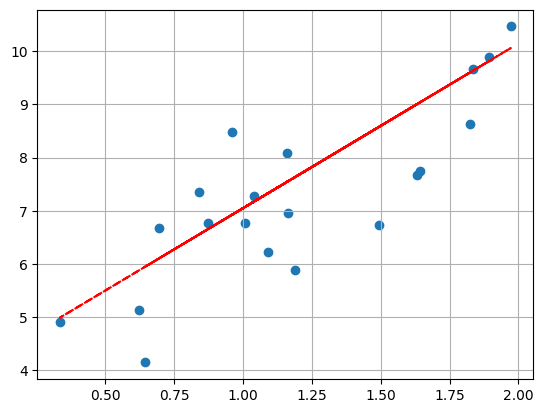

In [10]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red', linestyle = '--')

plt.grid()
plt.show()

In [11]:
x_new = np.array([[0.0], [2.0]])
y_pred_new = lr.predict(x_new)

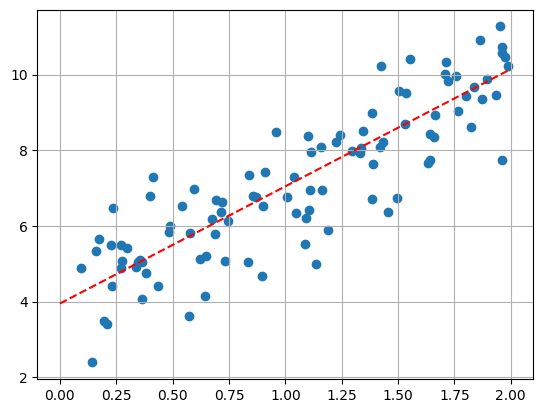

In [12]:
plt.scatter(x, y)
plt.plot(x_new, y_pred_new, color = 'red', linestyle = '--')

plt.grid()
plt.show()

In [13]:
r2_score(y_test, y_pred)

0.6065218852687343

In [14]:
mean_squared_error(y_test, y_pred)

1.0097843625802903

In [15]:
mean_absolute_percentage_error(y_test, y_pred)

0.12277910350036772

In [16]:
n = 100
x_b = np.c_[np.ones((n,1)), x]
x_b.shape

(100, 2)

In [17]:
theta = np.linalg.pinv(x_b.T.dot(x_b).dot(x_b.T).dot(y))
theta

array([[2.51905014e-06, 3.07215772e-06]])

In [18]:
from physics.RegressionModel import LinearRegression

In [19]:
lin = LinearRegression()

In [20]:
lin.fit(x_train, y_train)

In [21]:
print(f'El Bias es: {float(lin.intercept)}, mientras que el peso de t es: {float(lin.coef)}')

El Bias es: 3.950577814490075, mientras que el peso de t es: 3.097450030664821


/tmp/ipykernel_65275/4120439903.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'El Bias es: {float(lin.intercept)}, mientras que el peso de t es: {float(lin.coef)}')


In [22]:
y_pred = lin.predict(x_test)

In [23]:
r2_score(y_test, y_pred)

0.6065218852687353

# SDGRegressor #

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = ['t']
x = np.array(data[x])
y = ['v']
y = np.array(data[y])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [27]:
from sklearn.linear_model import SGDRegressor

In [28]:
reg = SGDRegressor(max_iter = 100, tol = 1e-3, eta0 = 1e-1)

In [29]:
reg.fit(x_train, y_train)

/home/EhwazM/VirtualEnvs/Python/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, max_iter=100)

In [30]:
reg.intercept_, reg.coef_

(array([3.88966583]), array([3.01475541]))

In [31]:
y_pred_r = reg.predict(x_test)

In [32]:
r2_score(y_test, y_pred_r)

0.7790612696692206

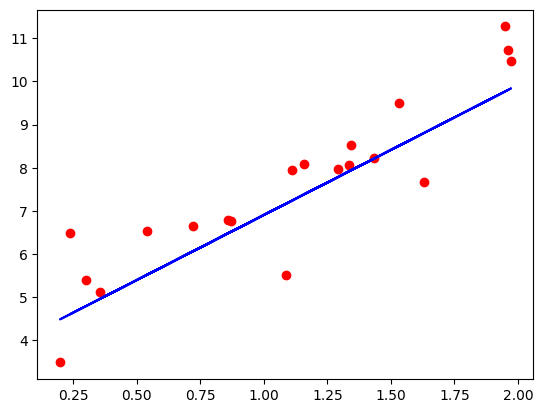

In [33]:
plt.scatter(x_test, y_test, c = 'red')
plt.plot(x_test, y_pred_r, c = 'blue')
plt.show()

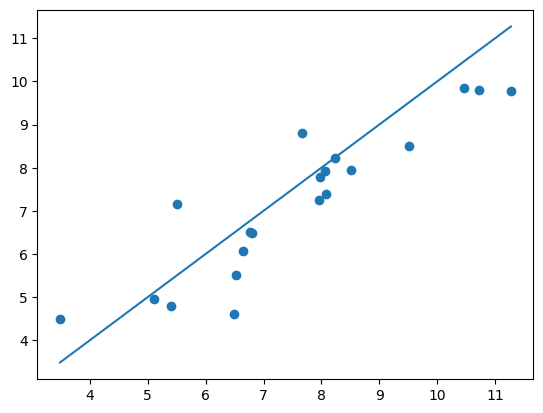

In [34]:
plt.scatter(y_test, y_pred_r)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel = ('valores reales')
plt.ylabel = ('predicción')
plt.show()

In [35]:
from physics.RegressionModel import DGRegression

In [36]:
reg_f = DGRegression()

In [37]:
reg_f.fit(x_train, y_train)

In [38]:
print(f'El Bias es: {float(reg_f.intercept)}, mientras que el peso de t es: {float(reg_f.coef)}')

El Bias es: 3.495489081022888, mientras que el peso de t es: 3.1931777885521817


/tmp/ipykernel_65275/3271980326.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'El Bias es: {float(reg_f.intercept)}, mientras que el peso de t es: {float(reg_f.coef)}')


In [39]:
reg_fm = DGRegression(lil_batch = 10)

In [40]:
reg_fm.fit(x_train, y_train)

In [41]:
print(f'El Bias es: {float(reg_fm.intercept)}, mientras que el peso de t es: {float(reg_fm.coef)}')

El Bias es: 3.4225665730817956, mientras que el peso de t es: 3.4190701188192034


/tmp/ipykernel_65275/1093794609.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'El Bias es: {float(reg_fm.intercept)}, mientras que el peso de t es: {float(reg_fm.coef)}')


In [42]:
reg_fs = DGRegression(seed = 28)

In [43]:
reg_fs.fit(x_train, y_train)

In [44]:
print(f'El Bias es: {float(reg_fs.intercept)}, mientras que el peso de t es: {float(reg_fs.coef)}')

El Bias es: 3.9199395043771585, mientras que el peso de t es: 2.999944428214088


/tmp/ipykernel_65275/580397103.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'El Bias es: {float(reg_fs.intercept)}, mientras que el peso de t es: {float(reg_fs.coef)}')
